<a href="https://colab.research.google.com/github/SAnjana2-1/Cat_vs_Dog_ImageClassifier/blob/main/Cat_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

LOAD DATASET FROM KAGGLE


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


 99% 1.05G/1.06G [00:11<00:00, 180MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.6MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# IMPORT LIBRARIES


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# CREATING CNN MODEL

In [ ]:


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.4284 - accuracy: 0.5693 - val_loss: 0.7866 - val_accuracy: 0.6116
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.6528 - accuracy: 0.6122 - val_loss: 0.6367 - val_accuracy: 0.6596
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6264 - accuracy: 0.6499 - val_loss: 0.6011 - val_accuracy: 0.6832
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5650 - accuracy: 0.7113 - val_loss: 0.5714 - val_accuracy: 0.7018
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5444 - accuracy: 0.7415 - val_loss: 0.5912 - val_accuracy: 0.6904
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5043 - accuracy: 0.7625 - val_loss: 0.5627 - val_accuracy: 0.7228
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4705 - accuracy: 0.7836 - val_loss: 0.5082 - val_ac

# TESTING

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/cat.jpg')
test_img2=cv2.imread('/content/dog.jpg')

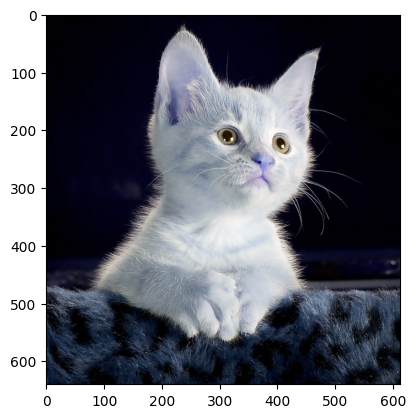

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(640, 612, 3)

In [ ]:
test_img= cv2.resize(test_img,(256,256))

In [ ]:
import numpy as np
test_input = test_img.reshape((1,256,256,3))

# PREDICTION


In [ ]:
predictions = model.predict(test_input)

# Convert predictions to labels
predicted_labels = np.where(predictions > 0.5, 'This is a dog', 'This is a cat')

# Print the predicted labels
for label in predicted_labels:
    print(label)

1/1 [==============================] - 0s 17ms/step
['This is a cat']


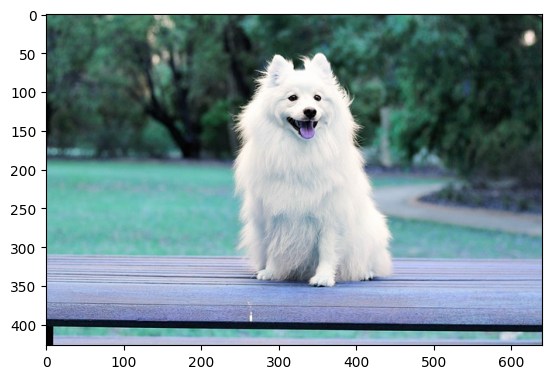

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(427, 640, 3)

In [ ]:
test_img2= cv2.resize(test_img2,(256,256))

In [ ]:
import numpy as np
testing = test_img2.reshape((1,256,256,3))

In [ ]:
predictions = model.predict(testing)

# Convert predictions to labels
predicted_labels = np.where(predictions > 0.5, 'This is a dog', 'This is a cat')

# Print the predicted labels
for label in predicted_labels:
    print(label)

1/1 [==============================] - 0s 18ms/step
['This is a cat']
